In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')


In [30]:
df=pd.read_csv("dataset - netflix1.csv")

In [31]:
df.shape

(8790, 10)

In [32]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [33]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [34]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [35]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [36]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [37]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [38]:
df['director'].unique()

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [39]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [40]:
df['show_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Name: show_id, Length: 8790, dtype: bool

In [41]:
df['director'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785     True
8786     True
8787     True
8788     True
8789     True
Name: director, Length: 8790, dtype: bool

In [42]:
dupl=df.pivot_table(index=['director'],aggfunc='size')
dupl

director
A. L. Vijay            2
A. Raajdheep           1
A. Salaam              1
A.R. Murugadoss        2
Aadish Keluskar        1
                      ..
Çagan Irmak            1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       2
Şenol Sönmez           2
Length: 4528, dtype: int64

In [43]:
df['release_year'].min()

1925

In [44]:
df['release_year'].max()

2021

In [45]:
from scipy import stats

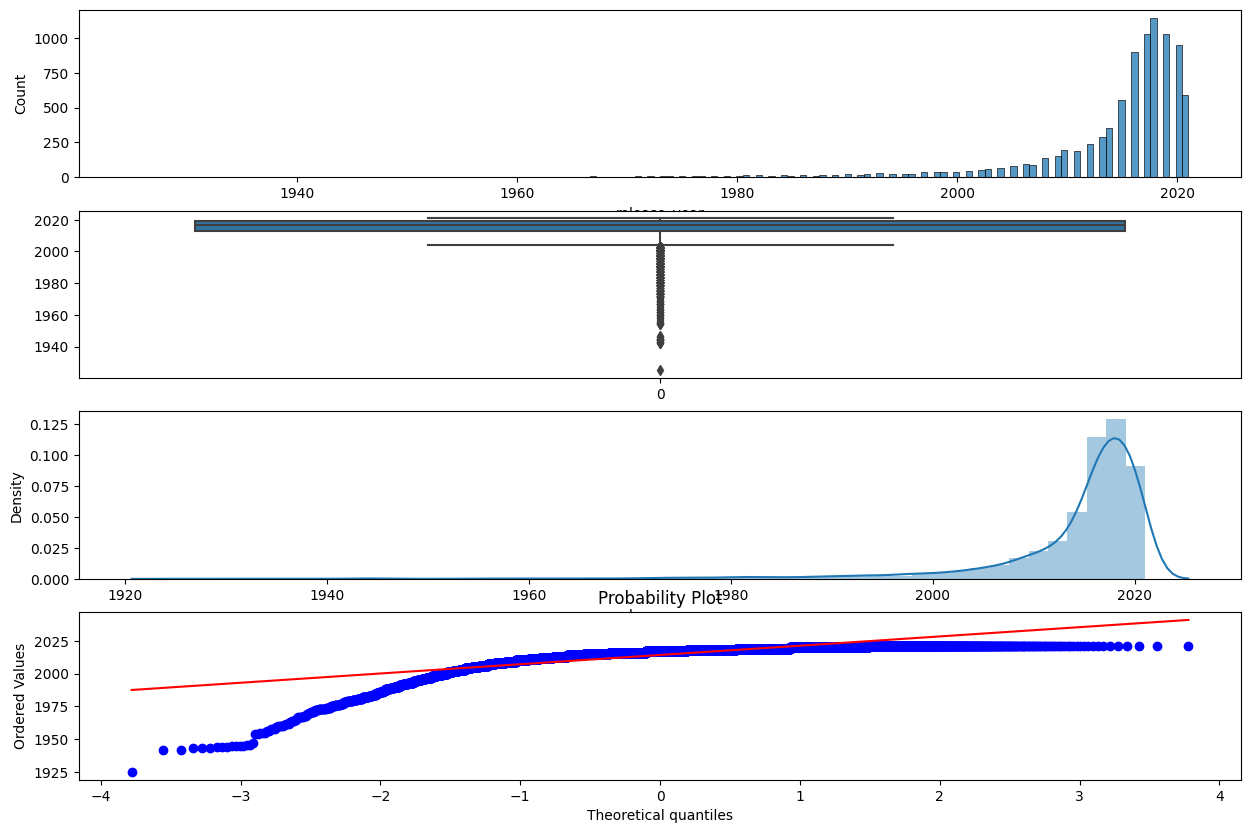

In [46]:
plt.figure(figsize=(15,10))

plt.subplot(411)
sns.histplot(df['release_year'])

plt.subplot(412)
sns.boxplot(df['release_year'])

plt.subplot(413)
sns.distplot(df['release_year'])

plt.subplot(414)
stats.probplot(df['release_year'],plot=plt)

plt.show()

In [47]:
# print("Highest allowed",df['release_year'].mean() + 3*df['release_year'].std())
# print("Lowest allowed",df['release_year'].mean() - 3*df['release_year'].std())

In [48]:
# df[(df['release_year'] > 2040.65) | (df['release_year'] < 1987.70)] 

In [49]:
percentile25 = df['release_year'].quantile(0.25)
percentile75 = df['release_year'].quantile(0.75)
iqr=percentile75-percentile25


In [50]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [51]:
df[df['release_year'] > upper_limit]
df[df['release_year'] < lower_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
29,s25,Movie,Jeans,S. Shankar,India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
51,s27,Movie,Minsara Kanavu,Rajiv Menon,India,2021-09-21,1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals"
53,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Not Given,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies"
60,s42,Movie,Jaws,Steven Spielberg,United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"
...,...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,Not Given,Hong Kong,2018-09-20,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies"
8743,s8524,TV Show,The Super Mario Bros. Super Show!,Not Given,United States,2016-05-22,1989,TV-Y7,1 Season,Kids' TV
8746,s8542,TV Show,The Twilight Zone (Original Series),Not Given,United States,2017-07-01,1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy"
8761,s8645,TV Show,Twin Peaks,Not Given,United States,2017-07-01,1990,TV-14,2 Seasons,"Classic & Cult TV, Crime TV Shows, TV Dramas"


In [52]:
df['release_year'] = df['release_year'][~((df['release_year'] < (percentile25 - 1.5 * iqr)) |(df['release_year'] > (percentile75 + 1.5 * iqr)))]
df.shape
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,NaN,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016.0,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016.0,TV-Y,1 Season,Kids' TV


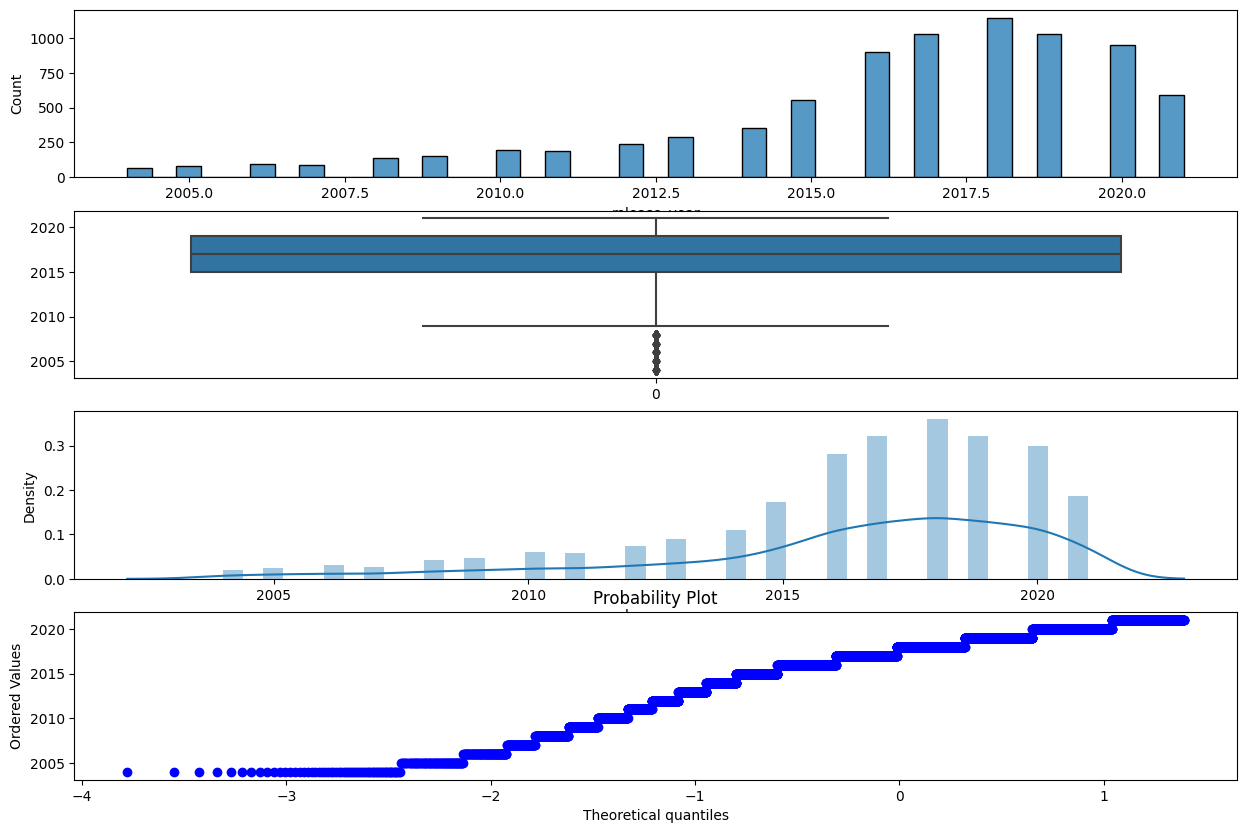

In [53]:
plt.figure(figsize=(15,10))

plt.subplot(411)
sns.histplot(df['release_year'])

plt.subplot(412)
sns.boxplot(df['release_year'])

plt.subplot(413)
sns.distplot(df['release_year'])

plt.subplot(414)
stats.probplot(df['release_year'],plot=plt)

plt.show()